In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag,pos_tag_sents
from nltk.stem import WordNetLemmatizer
import nltk
import seaborn as sns
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Load the CSV files into separate DataFrames
d1 = pd.read_csv('5_to_14_victim_count.csv')
d2 = pd.read_csv('15_to_30_victim_count.csv')
d3 = pd.read_csv('Highest_victim_count.csv')
d4 = pd.read_csv('Lessthan_5_victim_count.csv')

In [ ]:
df = pd.concat([d1, d2, d3, d4], ignore_index=True)
df .head()

,Name,Country,Years active,Proven victims,Possible victims,Notes
0,Carl Eugene Watts,United States,1974 to 1982,14,80+,Believed to have killed over 80 women in multi...
1,Philipp Tyurin,Soviet Union,1945 to 1946,14,29,"Known as the ""Leningrad Maniac"" and the ""Hellr..."
2,Zdzisław Marchwicki,Poland,1964 to 1970,14,21+,Also known as Vampire of Zagłębie. Killed 14 w...
3,Monster of Florence,Italy,1968 to 1985,14,16,Unidentified killer who shot couples in lovers...
4,Joachim Kroll,West Germany,1955 to 1976,14,NaN,"Known as the ""Ruhr Cannibal"" and ""The Duisburg..."


In [ ]:
df.rename(columns={'Possible victims': 'Possible_victims'}, inplace=True)
df.rename(columns={'Proven victims': 'Proven_victims'}, inplace=True)
df.rename(columns={'Years active': 'Years_active'}, inplace=True)

In [ ]:
df.Possible_victims.value_counts(dropna=False)
#28 serial killer killed 11 (possible)

11          28
10          22
13          19
14          12
12          11
            ..
26+          1
82+          1
65–67        1
172–300+     1
3+           1
Name: Possible_victims, Length: 113, dtype: int64

In [ ]:

df = df.apply(lambda x: x.apply(str) if x.dtype == 'object' else x)#preprocessing
df = df.apply(lambda x: x.str.rstrip('+') if x.dtype == 'object' else x)
df = df.apply(lambda x: x.str.rstrip('?') if x.dtype == 'object' else x)
df = df.apply(lambda x: x.str.lstrip('~') if x.dtype == 'object' else x)
df.Possible_victims.value_counts(dropna=False)

11       30
10       27
13       22
14       15
15       13
         ..
28        1
150       1
82        1
65–67     1
9-100     1
Name: Possible_victims, Length: 82, dtype: int64

In [ ]:
# Now let's handle the ranges. We need to split such values on '-' and then pick the 2nd value
df[df.Possible_victims.str.contains('-') == True]#short slash

,Name,Country,Years_active,Proven_victims,Possible_victims,Notes
251,Giuseppe Greco,Italy,1981 to 1983,58,80-300,"During the Second Mafia War, from 1981 to 1983..."
302,Albert Fish,United States,1924 to 1932,3,9-100,American serial killer and child rapist who co...


In [ ]:
# Looks like there are different types of hyphens in this df (short dashes and long dashes)
df[df.Possible_victims.str.contains('–') == True]#long slash

,Name,Country,Years_active,Proven_victims,Possible_victims,Notes
37,Donald Henry Gaskins,United States,1953 to 1982,12,31–80,"Known as ""The Meanest Man in America"", Gaskins..."
41,Dennis Nilsen,United Kingdom,1978 to 1983,12,15–16,Picked up young men in London between 1978 and...
53,Juana Barraza,Mexico,late 1990s to 2006,11,29–49,Female wrestler who bludgeoned or strangled el...
54,Zhang Yongming,China,2008 to 2012,11,17–20,Sold flesh of his victims as 'ostrich meat' an...
116,Yoshio Kodaira,China\r\nJapan,1928? to 1946,8–11,8–11,"A serial rapist, Kodaira killed his father-in-..."
127,Nikolai Dzhumagaliev,Soviet Union,1980 and earlier,7,50–100,Lured women in a park at night and hacked them...
130,Ivan Milat,Australia,1990s,7,23–37,Convicted of the Backpacker murders; sentenced...
154,Richard Cottingham,United States,1977 to 1980,5,85–100,Killer operating in New York and New Jersey wh...
156,John Floyd Thomas Jr.,United States,1957 to 2009,5,17–25,Serial murderer and rapist with one of the lon...
158,Steve Wright,United Kingdom,2006,5,5–22,"Referred to as ""Suffolk murders"", ""Ipswich mur..."


In [ ]:
# This will be used later to test our solution handling both types of hyphens
df.iloc[[280, 294]]

,Name,Country,Years_active,Proven_victims,Possible_victims,Notes
280,Baekuni,Indonesia,1993 to 2010,4,14,Pedophile who raped and killed young boys; ini...
294,Bernhard Prigan,Allied-occupied Germany\r\nWest Germany,1947 to 1952,3,16,Killed women near highways; confessed to a tot...


In [ ]:
# Let's replace all the ranges with both types of hyphens with the max value
df['Possible_victims'] = [str(x).split('-')[-1] for x in df['Possible_victims']]
df['Possible_victims'] = [str(x).split('–')[-1] for x in df['Possible_victims']]#replace with max value

In [ ]:
# Let's replace all the ranges with the max value
df['Proven_victims'] = [str(x).split('–')[-1] for x in df['Proven_victims']]
df.Proven_victims.value_counts(dropna=False)

11     25
13     24
10     22
3      18
16     16
9      16
7      15
12     14
14     13
15     13
6      12
4      11
8      11
5      10
19     10
18      7
21      6
17      6
33      4
20      4
23      3
30      3
36      3
35      3
24      3
32      2
25      2
28      2
49      2
27      2
22      2
50      2
38      1
39      1
41      1
42      1
45      1
48      1
71      1
52      1
53      1
58      1
60      1
67      1
70      1
72      1
83      1
100     1
110     1
26      1
138     1
Name: Proven_victims, dtype: int64

In [ ]:
df.sample(5)

,Name,Country,Years_active,Proven_victims,Possible_victims,Notes
151,Adrián Arroyo Gutiérrez,Costa Rica,2014 to 2015,6,11,"Known as ""The Southern Psychopath""; raped and ..."
260,Ahmad Suradji,Indonesia,1986 to 1997,42,80,Convicted of strangling at least 42 women and ...
95,Oleg Kuznetsov,Soviet Union\r\nRussia\r\nUkraine,1991 to 1992,10,10,"Robbed, raped and killed people around Russia ..."
126,Elizabeth Wettlaufer,Canada,2007 to 2018,8,8,Confessed to murdering eight senior citizens a...
218,Sipho Agmatir Thwala,South Africa,1996 to 1997,16,19,Nicknamed the Phoenix Strangler after the area...


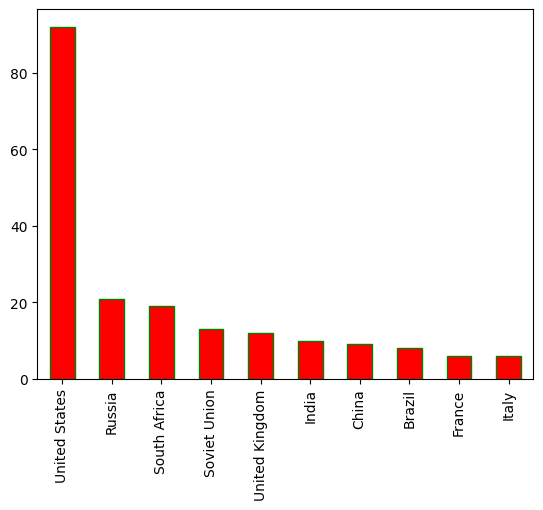

In [ ]:
df['Country'].value_counts().head(10).plot.bar(facecolor='r',edgecolor ='g')
plt.style.use('ggplot')

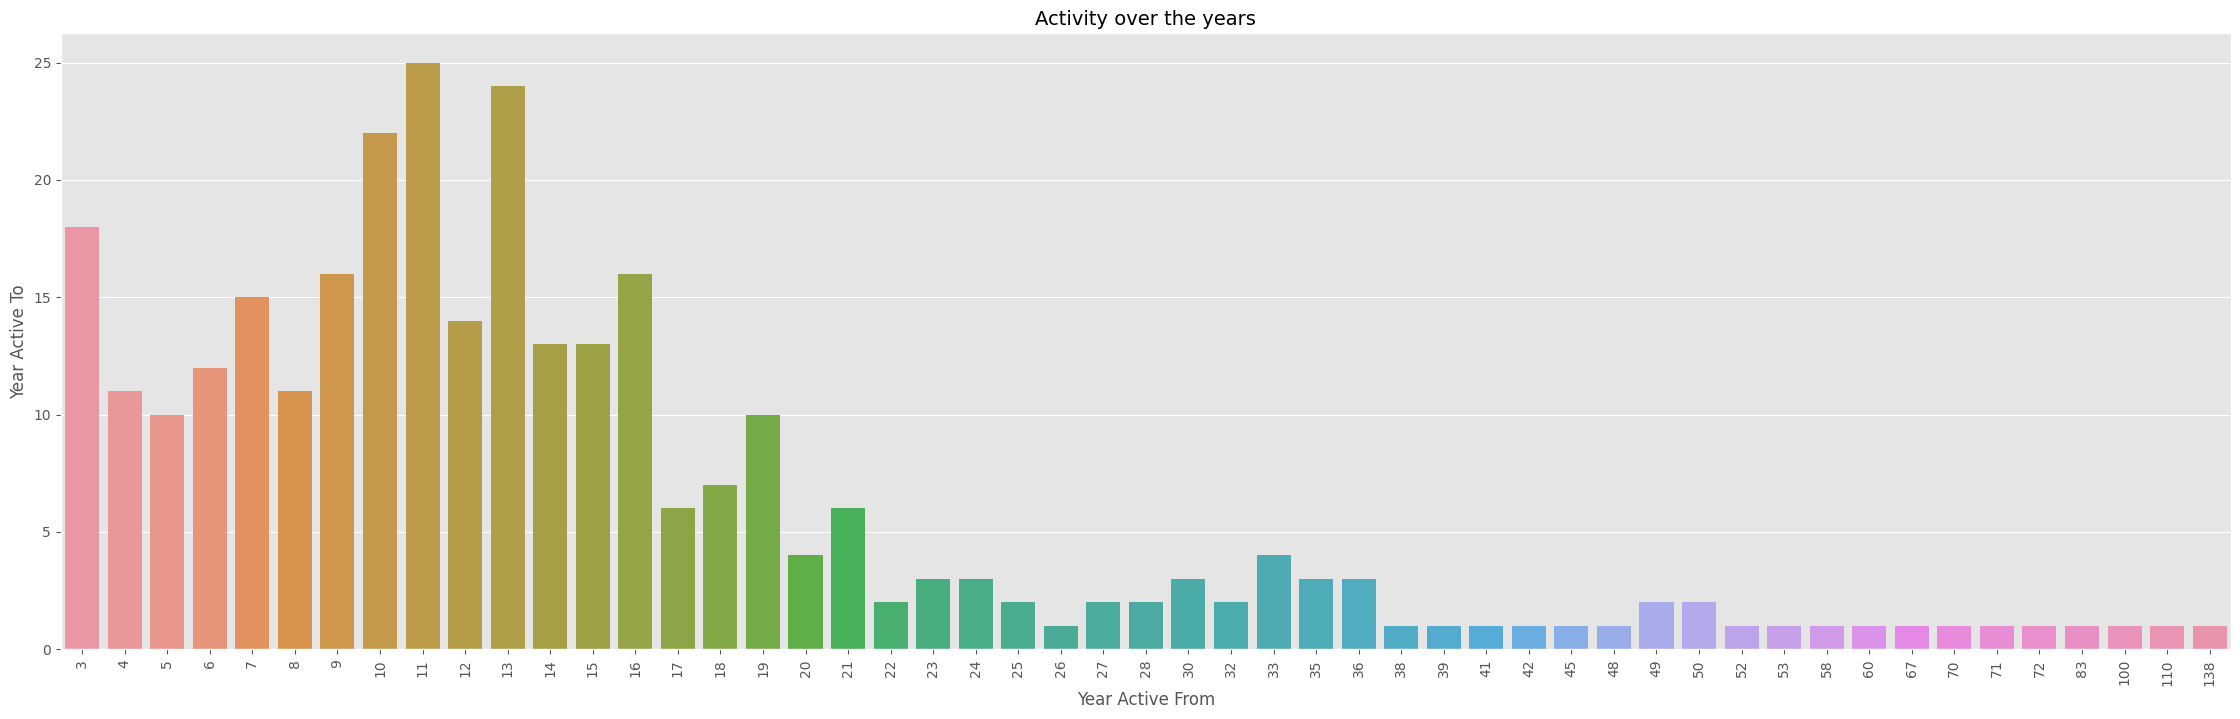

In [ ]:
# Plot to see pattern over the years
plt.figure(figsize=(28,8))
df.Proven_victims = df.Proven_victims.astype(int)
proven_victims_list = list(df.Proven_victims)
proven_victims_list.sort()
g = sns.countplot(x = proven_victims_list)
g.set(xlabel = 'Year Active From', ylabel = 'Year Active To')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title('Activity over the years',fontsize =14)
plt.show()

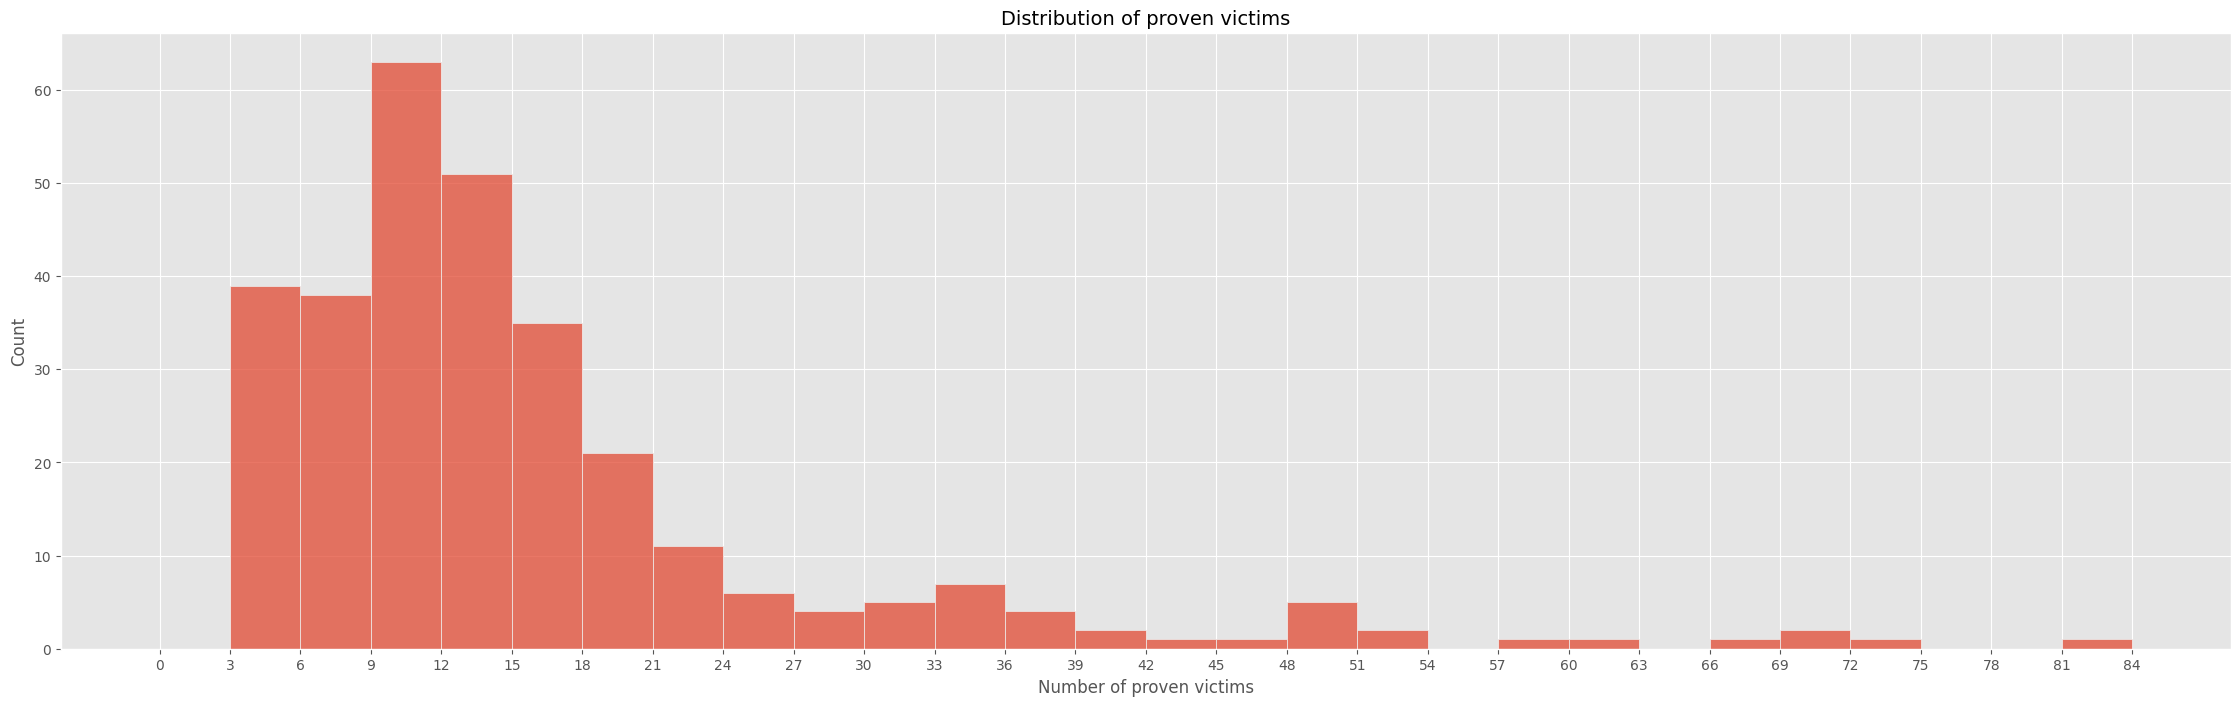

In [ ]:
# Plot to see distribution of proven victims
plt.figure(figsize=(28,8))

g = sns.histplot(x = proven_victims_list, bins = range(0,85,3))
g.set(xlabel = 'Number of proven victims')
g.set_title('Distribution of proven victims',fontsize =14)
plt.xticks(range(0,85,3))
plt.show()

In [ ]:
df[df.Country.str.contains('\r\n')].head(5)

,Name,Country,Years_active,Proven_victims,Possible_victims,Notes
28,Nikolai Dudin,Soviet Union\r\nRussia,1987 to 2002,13,13,"Known as the ""Grim Maniac""; killed his father ..."
39,Vladimir Romanov,Soviet Union\r\nRussia,1991 to 2005,12,20,"Known as the ""Kaliningrad Maniac""; pedophile w..."
43,Charles Sobhraj,Thailand\r\nNepal\r\nIndia\r\nMalaysia,1975 to 1976,12,13,"French con man known as ""The Bikini Killer"" or..."
52,Sergey Golovkin,Soviet Union\r\nRussia,1986 to 1992,11,40,Killed at least 11 boys in the Moscow area bet...
55,Jack Unterweger,Austria\r\nUnited States\r\nCzechoslovakia,1974 to 1992,11,15,Served 14 years in Austrian prison because of ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              305 non-null    object
 1   Country           305 non-null    object
 2   Years_active      305 non-null    object
 3   Proven_victims    305 non-null    int64 
 4   Possible_victims  305 non-null    object
 5   Notes             305 non-null    object
dtypes: int64(1), object(5)
memory usage: 14.4+ KB


In [ ]:
df[df.Country.str.contains('suspected')].sample(3)

,Name,Country,Years_active,Proven_victims,Possible_victims,Notes
159,Michel Peiry,Switzerland\r\nFrance\r\nUnited States\r\nYugo...,1981 to 1987,5,11,"Known as the ""Sadist of Romont""; Swiss soldier..."
177,Yvan Keller,France\r\nGermany (suspected)\r\nSwitzerland (...,1989 to 2006,23,150,"Known as the ""Pillow Killer""; killed and robbe..."
277,Robert Black,United Kingdom\r\nIreland (suspected)\r\nWest ...,1981 to 1986,4,18,"Convicted of kidnapping, raping and murdering ..."


In [ ]:
# Shouldn't be using replace function on Object data type, in this case, we need to apply replace function after converting it into a string.

df.Country = df.Country.str.replace('\(suspected\)', "", regex = True)
df.Country = df.Country.str.replace('\(alleged\)', "", regex = True)
df.Country = df.Country.str.replace('\(claimed\)', "", regex = True)#replace them with blank
df[df.Country.str.contains('\r\n')].sample(10)

,Name,Country,Years_active,Proven_victims,Possible_victims,Notes
95,Oleg Kuznetsov,Soviet Union\r\nRussia\r\nUkraine,1991 to 1992,10,10,"Robbed, raped and killed people around Russia ..."
271,Ali Asghar Borujerdi,Ottoman Empire\r\n Iraq\r\n Iran,1907 to 1934,33,33,"Known as ""Asghar the Murderer"". Killed 33 youn..."
264,Serhiy Tkach,Soviet Union\r\nUkraine,1984 to 2005,36,100,A former Ukrainian police criminal investigato...
55,Jack Unterweger,Austria\r\nUnited States\r\nCzechoslovakia,1974 to 1992,11,15,Served 14 years in Austrian prison because of ...
43,Charles Sobhraj,Thailand\r\nNepal\r\nIndia\r\nMalaysia,1975 to 1976,12,13,"French con man known as ""The Bikini Killer"" or..."
242,Luis Garavito,Colombia\r\nEcuador\r\nVenezuela,1992 to 1999,138,300,"Child-murderer, torture-killer, and rapist kno..."
128,Manuel Delgado Villegas,Spain\r\nFrance \r\nItaly,1964 to 1971,7,48,"Wandering criminal known as El Arropiero (""The..."
246,Daniel Camargo Barbosa,Colombia\r\nEcuador\r\nBrazil,1974 to 1986,72,180,"Child and woman murderer, believed to have pos..."
131,Michael Wayne McGray,Canada\r\nUnited States,1980s to 2010s,7,18,Convicted of the murder of six people in the l...
235,Ángel Maturino Reséndiz,United States\r\nMexico,1986 to 1999,15,18,"Known as the ""Railroad Killer"" because his kil..."


In [ ]:
# These replacements will result in some duplication as well. For e.g. there could be a row with both East-Germany and Germany
# listed as countries. So, after conversion to list we should remove duplicates

# Figuring these replacements took quiet some time
df.Country = df.Country.str.replace('Soviet Union', "Russia")
df.Country = df.Country.str.replace('West Germany', "Germany")
df.Country = df.Country.str.replace('East Germany', "Germany")
df.Country = df.Country.str.replace('German Empire', "Germany")
df.Country = df.Country.str.replace('Allied-occupied Germany', "Germany")
df.Country = df.Country.str.replace('Portuguese Angola', "Angola")
df.Country = df.Country.str.replace('Ottoman Empire', "Turkey")
df.Country = df.Country.str.replace('Kingdom of Romania', "Romania")

In [ ]:
# just select the first country from the list
df.Country = df.Country.str.split('\r\n', expand=True)[0]
df.Country.value_counts()

United States      95
Russia             42
South Africa       19
United Kingdom     13
China              10
India              10
France              8
Germany             8
Brazil              8
Colombia            7
Canada              6
Italy               6
Australia           5
Turkey              5
Mexico              4
South Korea         4
Japan               4
Spain               4
Iran                3
Indonesia           3
Argentina           3
Pakistan            2
Poland              2
Latvia              2
Bangladesh          2
Belgium             2
Ukraine             2
Austria             2
Costa Rica          2
Romania             2
Afghanistan         1
Ecuador             1
Yemen               1
Peru                1
Venezuela           1
Greece              1
Morocco             1
Egypt               1
Austria-Hungary     1
Switzerland         1
Swaziland           1
Singapore           1
Czechoslovakia      1
Belarus             1
Cyprus              1
Chile     

In [ ]:
# Let's check our improved df
df.sample(5)

,Name,Country,Years_active,Proven_victims,Possible_victims,Notes
185,Vasile Tcaciuc,Romania,1917 to 1935,21,26,Romanian man who lured victims and then murder...
107,Richard Biegenwald,United States,1958 to 1983,9,11,"Known as ""The Thrill Killer"". Killed at least ..."
104,Dagmar Overbye,Denmark,1913 to 1920,9,15,Murdered between nine and 25 children—of which...
197,Yevgeny Chuplinsky,Russia,1998 to 2006,19,19,"Known as the ""Novosibirsk Maniac""; killed pros..."
288,Ted Kaczynski,United States,1978 to 1996,3,3,Domestic terrorist and serial bomber known as ...


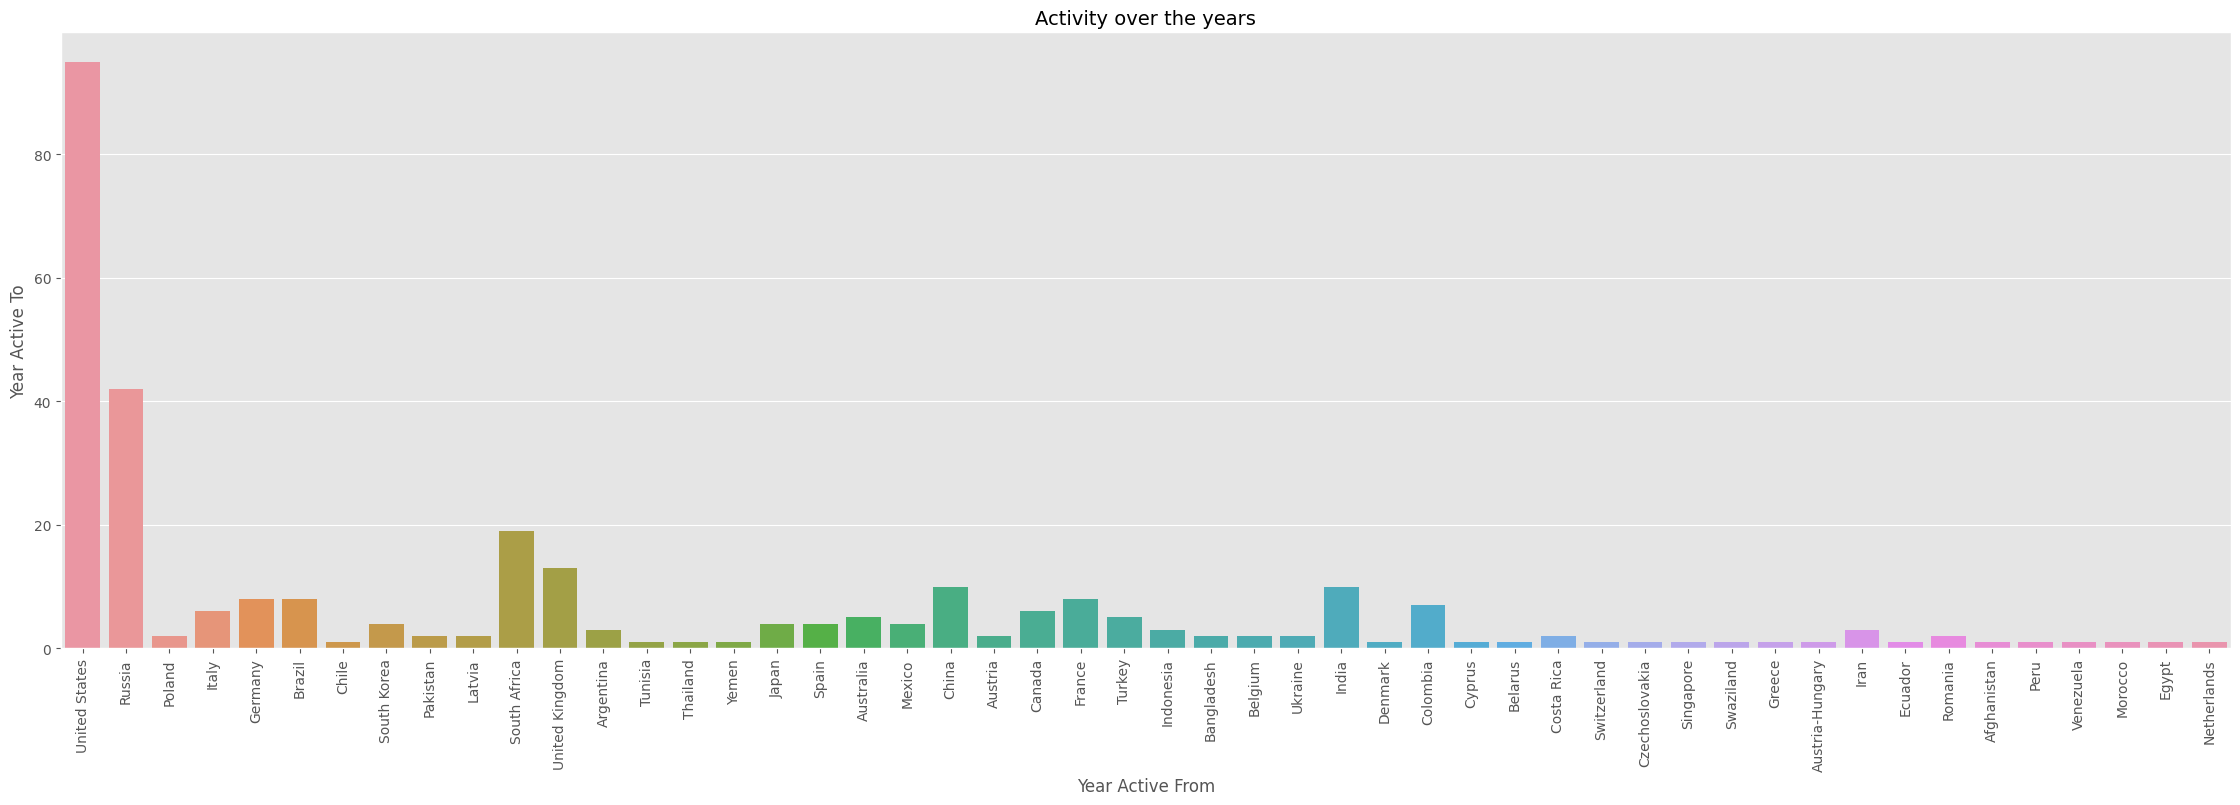

1991 to 1992    3
1989 to 1990    3
1992 to 1999    3
1990 to 1996    3
1950            3
               ..
1996 to 2000    1
1958 to 1963    1
1928 to 1946    1
1990 to 1995    1
1995            1
Name: Years_active, Length: 255, dtype: int64

In [ ]:
# Plot to see pattern over the years
plt.figure(figsize=(28,8))
# df.Proven_victims = df.Proven_victims.astype(int)
# proven_victims_list = list(df.Proven_victims)
# proven_victims_list.sort()
g = sns.countplot(data = df, x = 'Country')
g.set(xlabel = 'Year Active From', ylabel = 'Year Active To')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title('Activity over the years',fontsize =14)
plt.show()
df.Years_active.value_counts()
df.Years_active = df.Years_active.str.replace(' and earlier', '', regex = False)#replace null
df.Years_active = df.Years_active.str.replace(' to present', '', regex = False)
df.Years_active = df.Years_active.str.replace('30 June 1983', '1983', regex = False)#replace the year only
df.Years_active = df.Years_active.str.replace(' to 23 July 1983', '', regex = False)
df.Years_active = df.Years_active.str.replace('s', '', regex = False)#replace null
df.Years_active = df.Years_active.str.replace('?', '', regex = False)
df.Years_active = df.Years_active.str.replace('c.', '', regex = False)
df.Years_active = df.Years_active.str.replace('late ', '', regex = False)

# verify changes
df.Years_active.value_counts()

In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              305 non-null    object
 1   Country           305 non-null    object
 2   Years_active      305 non-null    object
 3   Proven_victims    305 non-null    int64 
 4   Possible_victims  305 non-null    object
 5   Notes             305 non-null    object
dtypes: int64(1), object(5)
memory usage: 14.4+ KB


In [ ]:
# Create new cols for To Date and From Date
df['From_Date'] = np.nan
df['To_Date'] = np.nan
df.head()
df[['From_Date','To_Date']] = df['Years_active'].str.split('to',expand=True)
df[['Years_active','From_Date','To_Date']].sample(5)

,Years_active,From_Date,To_Date
150,2000 to 2006,2000,2006
60,1915 to 1919,1915,1919
255,1982,1982,None
144,1980 to 1999,1980,1999
110,2015 to 2016,2015,2016


In [ ]:
# get rid of the now redundant Years_active col
df.drop('Years_active', axis=1, inplace=True)
df.columns

Index(['Name', 'Country', 'Proven_victims', 'Possible_victims', 'Notes',
       'From_Date', 'To_Date'],
      dtype='object')

In [ ]:
# check how many missing values in the To_Date col
df.To_Date.isna().sum() #44 missing values in to date

44

In [ ]:
# Replace with the corresponding values from the From_Date col
df.To_Date.fillna(df.From_Date,inplace=True)#replace null to date with start date
df.To_Date.isna().sum()

0

In [ ]:
# convert date related cols to int type so that their diff can be calculated
df.To_Date = pd.to_numeric(df.To_Date, errors='coerce')
df.From_Date = pd.to_numeric(df.From_Date, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              305 non-null    object
 1   Country           305 non-null    object
 2   Proven_victims    305 non-null    int64 
 3   Possible_victims  305 non-null    object
 4   Notes             305 non-null    object
 5   From_Date         305 non-null    int64 
 6   To_Date           305 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 16.8+ KB


In [ ]:
# Create new cols for number of active years
df['Active_Years'] = df.To_Date.values - df.From_Date.values
# Above op may result in some zero values if the to and from years are same. In such case value should be 1
df.Active_Years.replace({0:1}, inplace=True)
df[['Active_Years', 'From_Date','To_Date']].sample(10)

,Active_Years,From_Date,To_Date
169,1,1996,1997
159,6,1981,1987
264,21,1984,2005
147,25,1990,2015
210,1,2005,2006
287,4,1960,1964
19,5,1975,1980
222,1,1950,1950
18,17,1990,2007
249,3,2000,2003


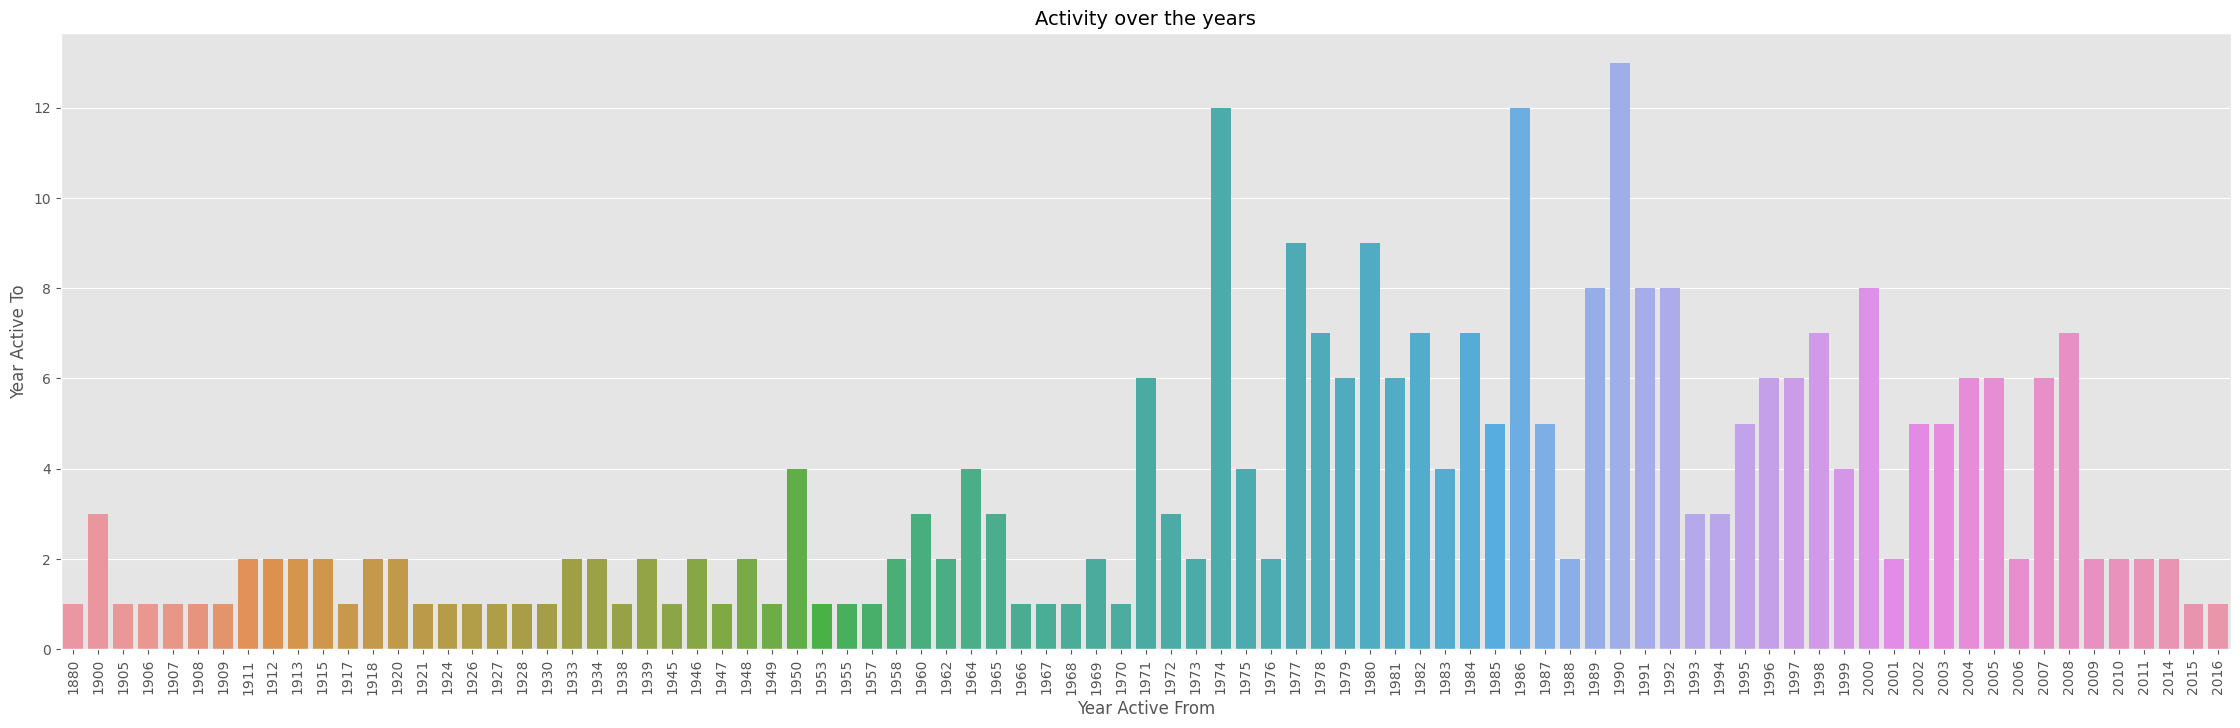

In [ ]:
# Plot to see pattern over the years
plt.figure(figsize=(28,8))
g = sns.countplot(data = df, x = "From_Date")
g.set(xlabel = 'Year Active From', ylabel = 'Year Active To')
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
g.set_title('Activity over the years',fontsize =14)
plt.show()

In [ ]:
# So, who was active for most number of years
top_active_df = df[['Country','Active_Years']].sort_values(by = 'Active_Years', ascending=False).head(15)
top_active_df

,Country,Active_Years
156,United States,52
247,Brazil,36
250,United States,35
276,United States,33
226,United States,32
97,Germany,32
131,Canada,30
85,United States,30
37,United States,29
187,Mexico,28


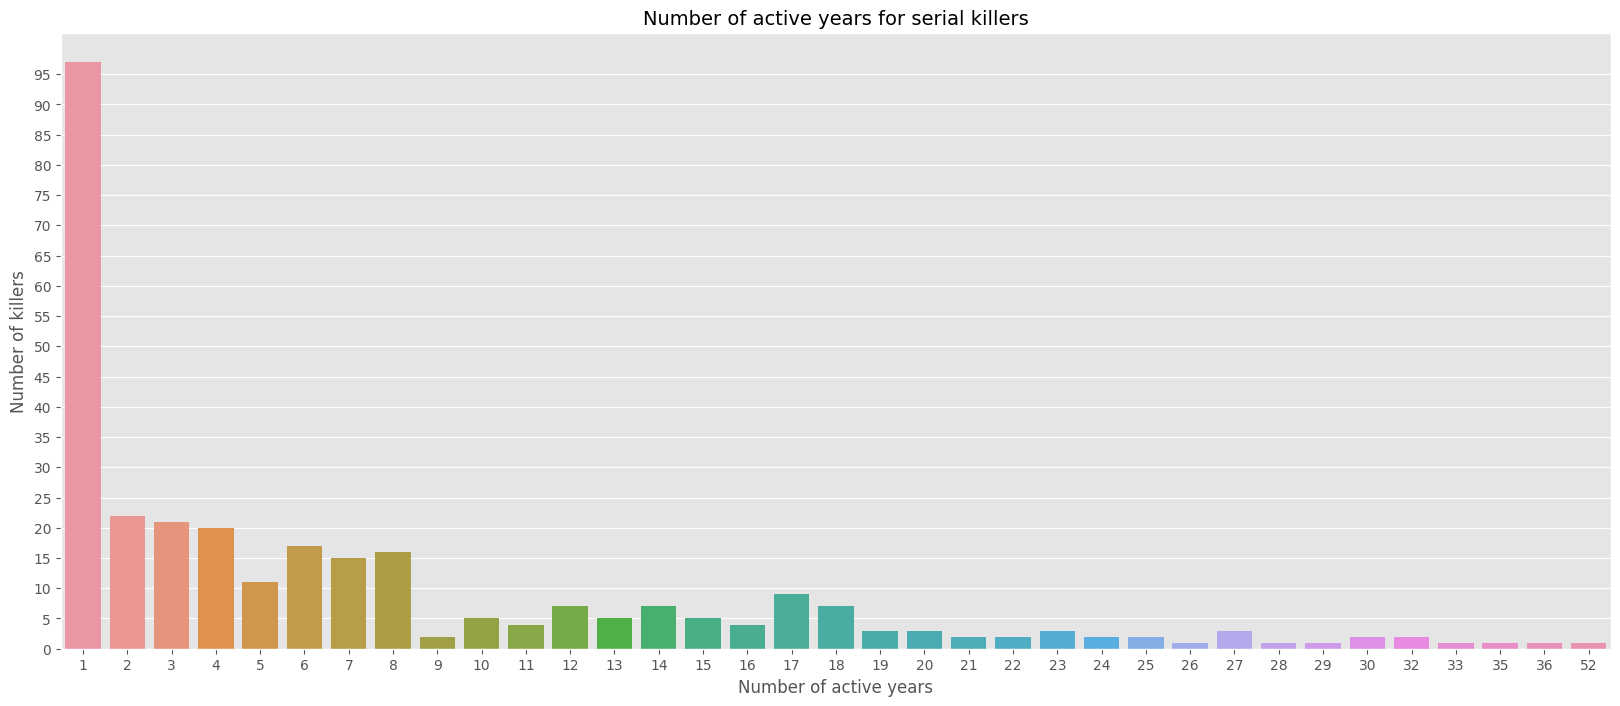

In [ ]:
plt.figure(figsize=(20,8))
g = sns.countplot(x='Active_Years', data=df)
g.set(yticks= range(0,100,5))
g.set(xlabel='Number of active years', ylabel='Number of killers')
g.set_title('Number of active years for serial killers',fontsize =14)
plt.show()

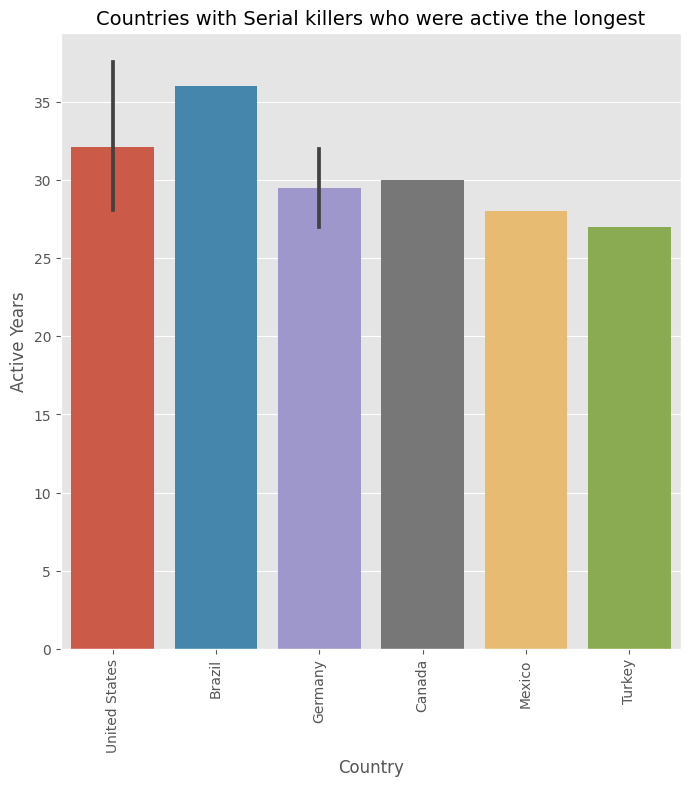

In [ ]:
plt.figure(figsize=(8,8))
g = sns.barplot(x = top_active_df.Country, y = top_active_df.Active_Years, data= top_active_df)
g.set(ylabel='Active Years')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title('Countries with Serial killers who were active the longest',fontsize =14)
plt.show()

In [ ]:
df.Name.value_counts()

Carl Eugene Watts              1
Velaphi Ndlangamandla          1
Asande Baninzi                 1
Christopher Mhlengwa Zikode    1
Umesh Reddy                    1
                              ..
Norman Afzal Simons            1
Roger Dale Stafford            1
Peter Kürten                   1
Louis van Schoor               1
John Martin                    1
Name: Name, Length: 305, dtype: int64

In [ ]:
# Let's breakdown the Name col
df['First_Name'] = np.nan
df['Last_Name'] = np.nan

# Return a list of the words in the string, using sep as the delimiter string. 2nd param (1 in this case) tell that at most 1 split is done (thus, the list will have at most 2 elements).
df[['First_Name','Last_Name']] = df['Name'].str.split(' ', 1, expand=True)
df[['Name','First_Name','Last_Name']].sample(5)

<ipython-input-43-0e357e47a4b5>:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['First_Name','Last_Name']] = df['Name'].str.split(' ', 1, expand=True)


,Name,First_Name,Last_Name
231,Dorángel Vargas,Dorángel,Vargas
278,Max Gufler,Max,Gufler
142,David Berkowitz,David,Berkowitz
135,Tommy Recco,Tommy,Recco
123,Vladimir Retunsky,Vladimir,Retunsky


In [ ]:
# Let's see if any of the killers have same first name or last name
df.First_Name.value_counts()[:10]
df.Last_Name.value_counts()[:10]

Kumar            2
Baninzi          1
Reddy            1
Woodfield        1
Paulin           1
John Knowles     1
Yapıcıoğlu       1
Ndlangamandla    1
Ershov           1
Kaupēns          1
Name: Last_Name, dtype: int64

In [ ]:
# Check how many of them committed suicide (in or outside prison)
committed_suicide = df[df.Notes.str.contains("committed suicide", case=False)]['Notes']
committed_suicide

11     Kidnapped, raped and murdered people; committe...
31     Known as "The Beast of Atteridgeville", he was...
39     Known as the "Kaliningrad Maniac"; pedophile w...
40     Killed prostitutes in the St. Louis area from ...
50     Strangled gay men and buried their bodies in h...
75     Known as Der Totmacher ("The Deadmaker"). Conv...
120    Military instructor suspected of killing boys ...
149    British ex-pat living in Australia. Known by t...
164    Killed and cannibalized poor travelers and hom...
176    Killed mainly women he considered unfaithful t...
177    Known as the "Pillow Killer"; killed and robbe...
198    Accused of killing at least 19 women. Charged ...
227    A habitual criminal, confessed to the rape and...
276    Committed suicide by hanging after murdering h...
Name: Notes, dtype: object

In [ ]:
# calc %age of killers who committed suicide (in or outside prison)
round(committed_suicide.shape[0] / df.shape[0] *100, 2)

4.59

In [ ]:
# Importing libs for NLP
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from collections import Counter
import spacy
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Define a function to plot word frequencies
def plot_word_frequency(words, top_n=15, rotation=0):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(28, 5))
    g = sns.barplot(x=labels, y=counts)
    return g


In [ ]:
# In order to perform NLP ops on Notes text we need to create a single text from combining all Notes
notes = "".join(df.Notes)
notes = notes.lower()
notes_words = notes.split()
# So, we have 62k+ words
len(notes_words)

10006

Text(0.5, 1.0, 'Word frequencies before removing stopwords and punctuations')

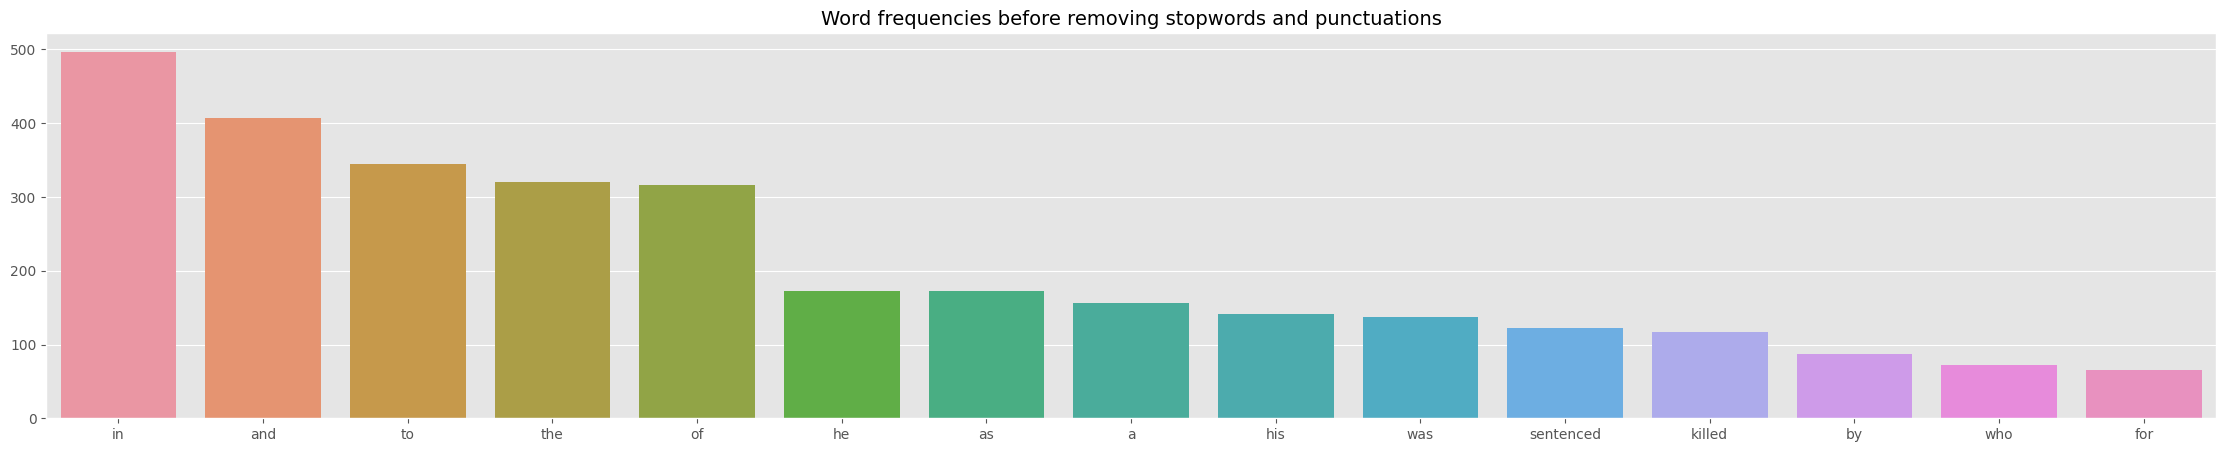

In [ ]:
plot_word_frequency(notes_words).set_title('Word frequencies before removing stopwords and punctuations',fontsize =14)

Text(0.5, 1.0, 'Word frequencies after removing stopwords and punctuations')

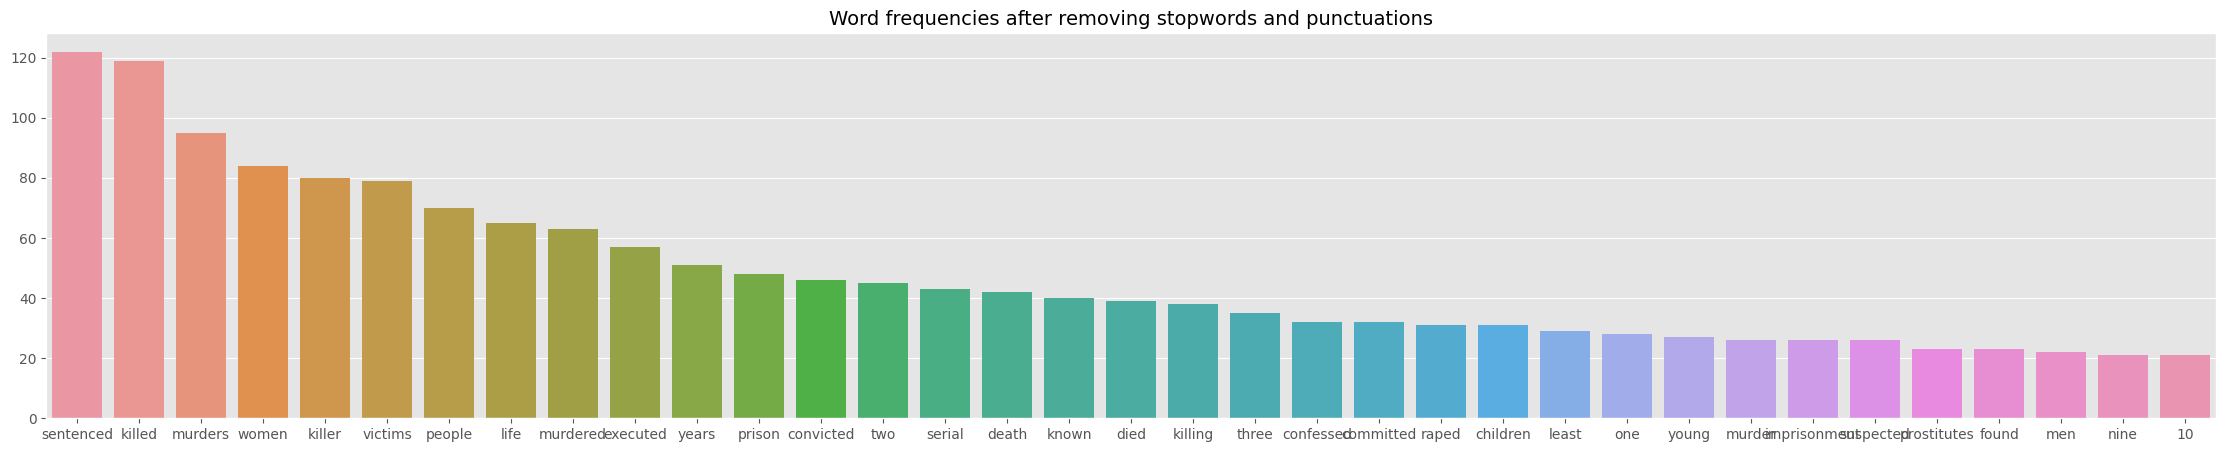

In [ ]:
# NLTK's word tokeniser not only breaks on whitespaces but also breaks contraction words such as he'll into "he" and "'ll". On the other hand it doesn't break "o'clock" and treats it as a separate token.

tokens = word_tokenize(notes)
# Removing stop words
tokens = [word for word in tokens if word not in stopwords.words('english')]

# remove punctuations (takes care of brackets, colons etc)
tokens = list(filter(lambda token: token not in string.punctuation, tokens))

# remove other special characters like quotes
notes = " ".join(tokens)
# The args of maketrans should be of equal length. Since we are replacing 9 spl chars with space, so the 2nd arg will be a string containing 9 spaces
tokens = notes.translate(str.maketrans("``\''", "    ")).split()
plot_word_frequency(tokens, 35, rotation = 90).set_title('Word frequencies after removing stopwords and punctuations',fontsize =14)

In [ ]:
# create a frequency table of all the words of the document
all_words = Counter(tokens)
# look at top 10 frequent words
all_words.most_common(10)

[('sentenced', 122),
 ('murder', 121),
 ('killed', 119),
 ('woman', 89),
 ('victim', 88),
 ('killer', 85),
 ('people', 70),
 ('life', 65),
 ('murdered', 63),
 ('executed', 57)]

In [ ]:
def edits_one(word):#make sure no missspilt words
    "Create all edits that are one edit away from `word`."
    alphabets    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])                   for i in range(len(word) + 1)]
    deletes    = [left + right[1:]                       for left, right in splits if right]
    inserts    = [left + c + right                       for left, right in splits for c in alphabets]
    replaces   = [left + c + right[1:]                   for left, right in splits if right for c in alphabets]
    transposes = [left + right[1] + right[0] + right[2:] for left, right in splits if len(right)>1]
    return set(deletes + inserts + replaces + transposes)

def edits_one(word):
    "Create all edits that are one edit away from `word`."
    alphabets    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])                   for i in range(len(word) + 1)]
    deletes    = [left + right[1:]                       for left, right in splits if right]
    inserts    = [left + c + right                       for left, right in splits for c in alphabets]
    replaces   = [left + c + right[1:]                   for left, right in splits if right for c in alphabets]
    transposes = [left + right[1] + right[0] + right[2:] for left, right in splits if len(right)>1]
    return set(deletes + inserts + replaces + transposes)

def edits_two(word):
    "Create all edits that are two edits away from `word`."
    return (e2 for e1 in edits_one(word) for e2 in edits_one(e1))

def known(words):
    "The subset of `words` that appear in the `all_words`."
    return set(word for word in words if word in all_words)

def possible_corrections(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits_one(word)) or known(edits_two(word)) or [word])

def prob(word, N=sum(all_words.values())):
    "Probability of `word`: Number of appearances of 'word' / total number of tokens"
    return all_words[word] / N

def spell_check(word):
    "Print the most probable spelling correction for `word` out of all the `possible_corrections`"
    correct_word = max(possible_corrections(word), key=prob)
    if correct_word != word:
        return "Did you mean " + correct_word + "?", False
    else:
        return "Correct spelling.", True

In [ ]:
# test spell check
tokens.append("ankur")

misspelt_word_count = 0
for token in tokens:
    desc,result = spell_check(token)
    if result == False:
        print(desc)

if misspelt_word_count == 0:
    print("No misspelt words present in Notes!")

Did you mean anger?
No misspelt words present in Notes!


In [ ]:

note=df.Notes[164]#print note after preprocessing
print(note)


Killed and cannibalized poor travelers and homeless vagrants. Kept a ledger recording his murders with at least 31 names in it (including Vincenz Olivier, his only surviving victim), thus confirming at least 30 victims. But due to the massive amount of human remains found in his apartment, his kill count is suspected by many to exceed 42 victims. Committed suicide by hanging himself in his holding cell before he could be tried.
